In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

Linear regression generally have the form of $Y_{i} = \theta_{0} + \theta_{1} x_{1} + \theta_{2} x_{2} + ...$ <br>
There are several ways to find the coefficients of the regression: <br>
1. Linear Algebra: $\hat{\theta} = (X^{T}X)^{-1}X^{T}Y$ (When X is invertible) <br>
2. Gradient Descent: In this case, we need to write out the loss function and try to minimize the loss. <br>
$\hspace{30mm}$ $F(x)$ = Loss Function = SE = $ \sum^{n}_{i=1} (Y_{i} - \hat{Y_{i}})^{2}$ <br>

## Model

In [2]:
class Linear_Regression():
    def __init__(self, alpha = 1e-10 , num_iter = 10000, early_stop = 1e-5, intercept = True, init_weight = None):
        
        
        """
            Some initializations, if neccesary
            
            attributes: 
                        alpha: Learning Rate, default 1e-10
                        num_iter: Number of Iterations to update coefficient with training data
                        early_stop: Constant control early_stop.
                        intercept: Bool, If we are going to fit a intercept, default True.
                        init_weight: Matrix (n x 1), input init_weight for testing.
                        
            
            TODO: 1. Initialize all variables needed.
        """
        
        self.model_name = 'Linear Regression'
        self.alpha = alpha
        self.num_iter = num_iter
        self.early_stop = early_stop
        self.intercept = intercept
        self.init_weight = init_weight  ### For testing correctness.
        
    
    def fit(self, X_train, y_train):
        """
            Save the datasets in our model, and perform gradient descent.
            
            Parameter:
                X_train: Matrix or 2-D array. Input feature matrix.
                Y_train: Matrix or 2-D array. Input target value.
                
                
                TODO: 2. If we are going to fit the intercept, add a col with all 1's to the first column. (hint: np.hstack, np.ones)
                      3. Initilaize our coef with uniform from [-1, 1] with the number of col in training set.
                      4. Call the gradient_descent function to train.
        """
        
        self.X = np.mat(X_train)
        self.y = np.mat(y_train).T
        
        if self.intercept:
            ones = np.ones((self.X.shape[0],1))
            self.X = np.hstack([ones, self.X])
        
        if not self.init_weight is None:
            self.coef = self.init_weight
        else:
            self.coef = np.mat(np.random.uniform(-1,1,self.X.shape[1])).T
        self.gradient_descent()
        
    def gradient(self):
        """
            Helper function to calculate thea gradient respect to coefficient.
            
            TODO: 5. Think about the matrix format of the gradient of the loss function. v
        """
        
        self.grad_coef = -( 2/self.X.shape[0] ) * self.X.T @ (self.y - self.X @ self.coef) 
        
    def gradient_descent(self):
        
        """
            Training function
            
            TODO: 6. Calculate the loss with current coefficients. v
                  7. Update the temp_coef with learning rate and gradient. v
                  8. Calculate the loss with temp_coef. v
                  9. Implement the self adeptive learning rate. v
                      a. If current error is less than previous error, increase learning rate by a factor 1.3. 
                         And update coef, with temp_coef.
                      b. If previous error is less than current error, decrease learning rate by a factor of 0.9.
                         Don't update coef.
                  10. Add the loss to loss list we create. v
        """
        
        self.loss = []
        
        for i in range(self.num_iter):

                
            self.gradient()

            previous_y_hat = self.X @ self.coef

            
            temp_coef = self.coef - self.alpha * self.grad_coef
            
            ones = np.mat(np.ones((1,self.X.shape[0])))  # Matrix with 1's (1 x n), help with calculate the sum of a mattrix. hint: Think about dot product.
            
            pre_error = ones @ np.square(self.y - previous_y_hat)
            
            current_error = ones @ np.square(self.y - self.X @ temp_coef)
            
            ### This is the early stop, don't modify fllowing three lines.
            if (abs(pre_error - current_error) < self.early_stop) | (abs(abs(pre_error - current_error) / pre_error) < self.early_stop):
                self.coef = temp_coef
                return self
            
            if current_error <= pre_error:
                self.coef = temp_coef
                self.alpha = self.alpha * 1.3
            else:
                self.alpha = self.alpha * 0.9
                
            self.loss.append(current_error[0,0])
            
            if i % 100000 == 0:
                print('Iteration: ' +  str(i))
                print('Coef: '+ str(self.coef))
                print('Loss: ' + str(current_error))            
        return self
    
    def ind_predict(self, x: list):
        """
            Predict the value based on its feature vector x.

            Parameter:
            x: Matrix, array or list. Input feature point.
            
            Return:
                result: prediction of given data point
        """
        
        """
            TODO: 11. Implement the prediction function
        """

        result = np.matrix(x).reshape((1, -1)) @ self.coef
        
        return result[0,0]
    
    def predict(self, X):
        """
            X is a matrix or 2-D numpy array, represnting testing instances. 
            Each testing instance is a feature vector. 
            
            Parameter:
            X: Matrix, array or list. Input feature point.
            
            Return:
                ret: prediction of given data matrix
        """
        
        """
            TODO: 12. Make sure add the 1's column like we did to add intercept.
                  13. Revise the following for-loop to call ind_predict to get predictions.

        """
        
        ret = []
        X = np.mat(X)
        if self.intercept:
            ones = np.ones((X.shape[0],1))
            X = np.hstack([ones, X])
        for x in X:
            ret.append(self.ind_predict(x))
        return ret
        
        

In [3]:
def min_max_normaliz(lst):
    """
    Helper function for normalize for faster training.
    """
    maximum = np.max(lst)
    minimum = np.min(lst)

    return (lst - minimum) / (maximum - minimum)

## Test on simulated dataset

### We generate some easy data for testing. We should fit a line with, $Y = 30 * X + 20$

In [4]:
X = np.array(np.mat(np.arange(1, 1000, 5)).T)
y = np.array((30 * X)).flatten() +  20

In [5]:
X.shape

(200, 1)

In [6]:
y.shape

(200,)

#### Do NOT modify the following line, just run it when you are done.  You can also try different initialization, you will notice different coef at the end.

In [7]:
clf = Linear_Regression(alpha = 1, num_iter = 10000000, init_weight= np.mat([1,25]).T, early_stop = 1e-6)
clf.fit(X,y)

Iteration: 0
Coef: [[ 1]
 [25]]
Loss: [[7.39155222e+20]]


In [8]:
clf.coef

matrix([[ 1.01028477],
        [30.02841905]])

## Test on real dataset

In [9]:
url_Wine = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
wine = pd.read_csv(url_Wine, delimiter=';')
X = wine[['density','alcohol']]
y = wine.quality

In [10]:
lr = LinearRegression()
lr.fit(X,y)
## Squared Error with sklearn.
sum((lr.predict(X) - y)**2)

800.6676988774326

#### You will notice different coefficients, but the loss is very close to each other like 805. In your report, briefly discuss this problem.

In [11]:
clf = Linear_Regression(alpha = 1, num_iter = 100000, early_stop = 0)
clf.fit(X,y)

Iteration: 0
Coef: [[ 0.21357606]
 [ 0.9420363 ]
 [-0.32198655]]
Loss: [[4.90649293e+09]]


In [12]:
X_norm = min_max_normaliz(X)

In [13]:
ymin = min(y)
ymax = max(y)

In [14]:
y_norm = min_max_normaliz(y)

In [15]:
clf2 = Linear_Regression(alpha = 1, num_iter = 100000, early_stop = 0)
clf2.fit(X_norm,y_norm)

Iteration: 0
Coef: [[ 0.09631796]
 [-0.37668873]
 [ 0.81023691]]
Loss: [[644.09886853]]


In [16]:
pred1 = clf.predict(X)
pred2 = clf2.predict(X_norm) 

In [17]:
pred2 = np.array(pred2) * (ymax - ymin) + ymin

In [18]:
np.sum((pred1 - y)**2)

805.4827226890109

In [19]:
np.sum((pred2 - y)**2)

800.6676988774346

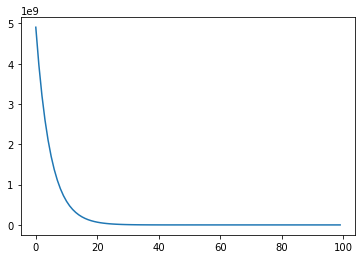

In [20]:
plt.plot(clf.loss[:100])

In [21]:
clf.alpha

0.008382678599115961

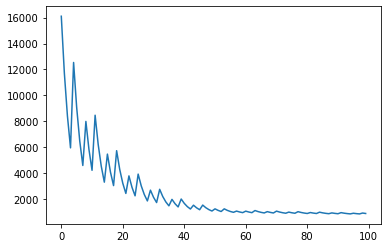

In [22]:
plt.plot(np.array(clf2.loss)[:100]*25)